In [2]:

%load_ext autoreload
%autoreload 2
from libero.libero.envs import OffScreenRenderEnv
from IPython.display import display
from PIL import Image

import torch
import torchvision

In [3]:
from libero.libero.envs.regions import MultiRegionRandomSampler
print(MultiRegionRandomSampler)

<class 'libero.libero.envs.regions.base_region_sampler.MultiRegionRandomSampler'>


In [4]:
import imageio

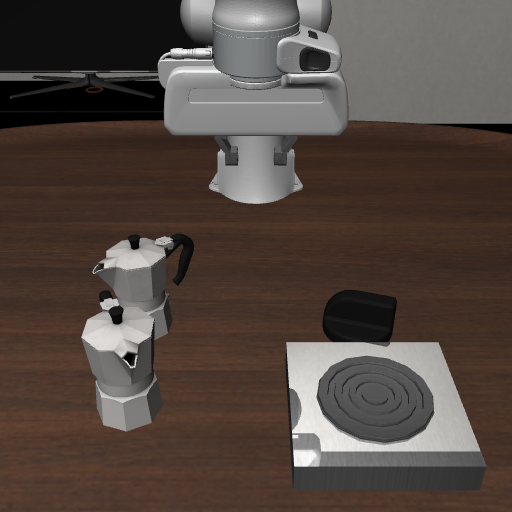

In [10]:

bddl_file_name = "/home/leisongao/LIBERO/libero/libero/bddl_files/libero_10_random_temp/LIVING_ROOM_MOKA_POTS_BASE_put_both_moka_pots_on_the_stove.bddl"
env_args = {
    "bddl_file_name": bddl_file_name,
    "camera_heights": 512,
    "camera_widths": 512
}

import matplotlib.pyplot as plt
from PIL import Image
import numpy as np

n_rows, n_cols = 4, 5
num_samples = n_rows * n_cols

# fig, axes = plt.subplots(n_rows, n_cols, figsize=(n_cols*2, n_rows*2))
# axes = axes.flatten()  # easier to iterate

# try:
env = OffScreenRenderEnv(**env_args)
obs = env.reset()
# display(Image.fromarray(obs["agentview_image"][::-1]))

display(Image.fromarray(obs["agentview_image"][::-1, ::-1]))
# except RandomizationError:
# for i in range(num_samples):
#     obs = env.reset()
#     img = obs["agentview_image"][::-1, ::-1]  # flip vertically and horizontally if needed
#     axes[i].imshow(img)
#     axes[i].axis('off')  # hide axes

# plt.tight_layout()
# plt.show()

In [9]:
action = np.array([0, 0, 0, 0, 0, 0, 0])
obs = [env.step(action) for _ in range (60)]

video_writer = imageio.get_writer("demo_video.mp4", fps=15)
for o in obs:
    img = np.array(o[0]["agentview_image"][::-1, ::-1])
    wrist_img = np.array(o[0]["robot0_eye_in_hand_image"][::-1, ::-1])
    combined = np.concatenate([img, wrist_img], axis=1)
    video_writer.append_data(combined)
video_writer.close()

In [38]:
obs[0][0].keys()

odict_keys(['robot0_joint_pos', 'robot0_joint_pos_cos', 'robot0_joint_pos_sin', 'robot0_joint_vel', 'robot0_eef_pos', 'robot0_eef_quat', 'robot0_gripper_qpos', 'robot0_gripper_qvel', 'agentview_image', 'robot0_eye_in_hand_image', 'basket_1_pos', 'basket_1_quat', 'basket_1_to_robot0_eef_pos', 'basket_1_to_robot0_eef_quat', 'alphabet_soup_1_pos', 'alphabet_soup_1_quat', 'alphabet_soup_1_to_robot0_eef_pos', 'alphabet_soup_1_to_robot0_eef_quat', 'tomato_sauce_1_pos', 'tomato_sauce_1_quat', 'tomato_sauce_1_to_robot0_eef_pos', 'tomato_sauce_1_to_robot0_eef_quat', 'milk_1_pos', 'milk_1_quat', 'milk_1_to_robot0_eef_pos', 'milk_1_to_robot0_eef_quat', 'cream_cheese_1_pos', 'cream_cheese_1_quat', 'cream_cheese_1_to_robot0_eef_pos', 'cream_cheese_1_to_robot0_eef_quat', 'orange_juice_1_pos', 'orange_juice_1_quat', 'orange_juice_1_to_robot0_eef_pos', 'orange_juice_1_to_robot0_eef_quat', 'butter_1_pos', 'butter_1_quat', 'butter_1_to_robot0_eef_pos', 'butter_1_to_robot0_eef_quat', 'ketchup_1_pos', 'ke

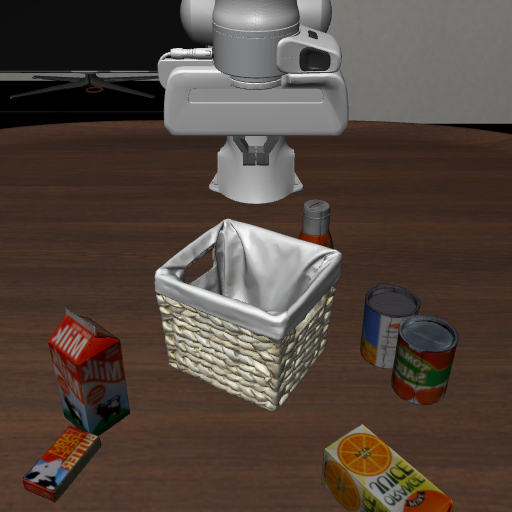

In [26]:

display(Image.fromarray(obs[-1][0]["agentview_image"][::-1, ::-1]))

In [7]:
init_state_path = "/home/leisongao/LIBERO/libero/libero/init_files/libero_10_diff_obj/FLOOR_ALPHABET_SOUP_TOMATO_SAUCE_SCENE13000_put_the_alphabet_soup_in_the_basket_and_put_the_tomato_sauce_in_the_basket.init"

In [47]:
def bbox_to_centroid(xmin, xmax, ymin, ymax): # x is forward/backward in sim, y is left right
    # returns centroid, bounds
    return (
        [round((xmin + xmax) / 2, 3), round((ymin + ymax) / 2, 3)], 
        [round((xmax - xmin) / 2, 3), round((ymax - ymin) / 2, 3)]
    )

In [48]:
bbox_to_centroid(-0.2, 0.15, -0.2, 0.2) # full domain

([-0.025, 0.0], [0.175, 0.2])

In [99]:
bbox_to_centroid(0.0, 0.15, -0.3, 0.3)

([0.075, 0.0], [0.075, 0.3])